## Jupyter Notebook for PlantCLEF 2025 Competition

Author: Jacob A Rose

Date: Mon Apr 14th, 2025

Highlights:
- Downloads the metadata for the PlantCLEF 2025 dataset using Kaggle API.
- Defines utility functions for processing dataset file paths.
- Prepares inputs for training and validation using class mappings.

Note: Ensure Kaggle API is configured and accessible before running the notebook.

In [1]:
# !uv pip install kaggle
# %%bash

# data_dir=${HOME}/plantclef-vision/data/plantclef2025/competition-metadata
# mkdir -p $data_dir
# kaggle competitions download -c plantclef-2025 -p $data_dir
# unzip -q -o $data_dir/plantclef-2025.zip -d $data_dir
# rsync -ah --progress "plantclef2025/PlantCLEF2024singleplanttrainingdata_800_max_side_size/PlantCLEF2024singleplanttrainingdata_800_max_side_size/images_max_side_800" "plantclef2025/PlantCLEF2024singleplanttrainingdata_800_max_side_size/images_max_side_800"
# !find PlantCLEF2024singleplanttrainingdata_800_max_side_size/images_max_side_800/* -maxdepth 0 -type d | wc -l
# !git config --global user.name "Jacob A Rose"
# !git config --global user.email jacobrose.codes@gmail.com
# !uv pip install 'ibis-framework[duckdb,examples]'
# !uv pip install "modin[all]"

In [1]:
%load_ext autoreload
%autoreload 2

## Preprocessing Metadata

### 1. Define file paths

We need:
1. `dataset_dir` - The root dir of the image dataset
2. `train_metadata_path` - The absolute file path of the train metadata csv file

In [1]:
import os
from pathlib import Path
# import modin.pandas as pd


analysis_dir = os.path.expanduser("~/plantclef-vision/results/analysis")
# os.makedirs(analysis_dir, exist_ok=True)
print(analysis_dir)
short_cols = [
    "organ",
    "species_id",
    "obs_id",
    "license",
    "author",
    "altitude",
    "latitude",
    "longitude",
    "gbif_species_id",
    "species",
    "genus",
    "family",
    "dataset",
    "publisher",
    "learn_tag",
]

# Root directory of the image file paths on disk
dataset_dir = Path(
    "/teamspace/studios/this_studio/plantclef-vision/data/plantclef2025/PlantCLEF2024singleplanttrainingdata_800_max_side_size/images_max_side_800"
)

# File path of the competition-provided csv train metadata
train_metadata_path = Path(
    "/teamspace/studios/this_studio/plantclef-vision/data/plantclef2025/competition-metadata/PlantCLEF2024_single_plant_training_metadata.csv"
)

##############
# metadata_dir = metadata_path.parent
# train_metadata_name = train_metadata_path.stem

# train_metadata_cache_path = Path(train_metadata_dir, train_metadata_name + ".parquet")
# train_metadata_cache_path

/teamspace/studios/this_studio/plantclef-vision/results/analysis


In [3]:
!pip list | grep plantclef

plantclef                         0.1.1          /teamspace/studios/this_studio/plantclef-vision


In [5]:
import plantclef

In [6]:
dir(plantclef)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

In [7]:
import pandas as pd
from pathlib import Path
from plantclef.data.optimize_plantclef import load_metadata



ModuleNotFoundError: No module named 'plantclef.data'

In [ ]:

dataset_dir = Path(
    "/teamspace/studios/plantclef2025/plantclef-vision/data/plantclef2025/PlantCLEF2024singleplanttrainingdata_800_max_side_size/images_max_side_800"
)

# File path of the competition-provided csv train metadata
train_metadata_path = Path(
    "/teamspace/studios/plantclef2025/plantclef-vision/data/plantclef2025/competition-metadata/PlantCLEF2024_single_plant_training_metadata.csv"
)

data_df, class2idx = load_metadata(
    metadata_path=train_metadata_path, dataset_dir=dataset_dir
)

metadata = pd.read_parquet(metadata_cache_path)
metadata.head(5)

In [10]:
# metadata[["altitude", "latitude", "longitude"]].head(5)
geo = metadata[["altitude", "latitude", "longitude"]]

In [ ]:
geo.to

In [12]:
# metadata.dtypes.to_dict()

metadata_opt = metadata.convert_dtypes()  # .dtypes.to_dict()
metadata_opt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408033 entries, 0 to 1408032
Data columns (total 21 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   image_name        1408033 non-null  string 
 1   organ             1408033 non-null  string 
 2   species_id        1408033 non-null  Int64  
 3   obs_id            1408033 non-null  Int64  
 4   license           1408033 non-null  string 
 5   partner           115338 non-null   string 
 6   author            1405895 non-null  string 
 7   altitude          705322 non-null   Float64
 8   latitude          705425 non-null   Float64
 9   longitude         705424 non-null   Float64
 10  gbif_species_id   1406725 non-null  Int64  
 11  species           1408033 non-null  string 
 12  genus             1408033 non-null  string 
 13  family            1408033 non-null  string 
 14  dataset           1408033 non-null  string 
 15  publisher         1357307 non-null  string 
 16  

In [5]:
!pip list | grep plantclef

In [22]:
# def optimize_pandas_dtypes(data_df: pd.DataFrame) -> pd.DataFrame:
#     """
#     Optimize the dtypes of a pandas DataFrame by converting to the most
#     memory-efficient dtypes.

#     """
#     data_df = data_df.convert_dtypes()
#     val_counts = data_df.nunique()

#     max_categories = 10_000
#     categorical_cols = val_counts[val_counts < max_categories].index.tolist()

#     data_df = data_df.astype({col: "category" for col in categorical_cols})

#     return data_df

# metadata_opt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408033 entries, 0 to 1408032
Data columns (total 21 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   image_name        1408033 non-null  string  
 1   organ             1408033 non-null  category
 2   species_id        1408033 non-null  category
 3   obs_id            1408033 non-null  Int64   
 4   license           1408033 non-null  category
 5   partner           115338 non-null   category
 6   author            1405895 non-null  string  
 7   altitude          705322 non-null   Float64 
 8   latitude          705425 non-null   Float64 
 9   longitude         705424 non-null   Float64 
 10  gbif_species_id   1406725 non-null  category
 11  species           1408033 non-null  category
 12  genus             1408033 non-null  category
 13  family            1408033 non-null  category
 14  dataset           1408033 non-null  category
 15  publisher         1357307 non-nu

In [40]:
metadata_opt.nunique()

image_name          1408033
organ                     7
species_id             7806
obs_id              1151904
license                  12
partner                   5
author               178333
altitude             306564
latitude             573376
longitude            577352
gbif_species_id        7796
species                7806
genus                  1446
family                  181
dataset                   2
publisher                 5
references          1215736
url                 1408033
learn_tag                 3
image_backup_url    1408033
image_path          1408033
dtype: int64

In [38]:
# metadata_opt["obs_id"].astype("")
# metadata_opt["obs_id"].astype("uint32").info()
metadata_opt["obs_id"].astype("uint32").astype("Int64").compare(metadata_opt["obs_id"])

,self,other
1102506,147392323,4442359619
1102519,143795378,4438762674
1102532,119280617,4414247913
1102575,105248472,4400215768
1102576,122067992,4417035288
...,...,...
1408028,141137961,4436105257
1408029,141137961,4436105257
1408030,141137961,4436105257
1408031,141137961,4436105257


In [35]:
metadata_opt["obs_id"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1408033 entries, 0 to 1408032
Series name: obs_id
Non-Null Count    Dtype
--------------    -----
1408033 non-null  Int64
dtypes: Int64(1)
memory usage: 12.1 MB


In [3]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408033 entries, 0 to 1408032
Data columns (total 21 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   image_name        1408033 non-null  object 
 1   organ             1408033 non-null  object 
 2   species_id        1408033 non-null  int64  
 3   obs_id            1408033 non-null  int64  
 4   license           1408033 non-null  object 
 5   partner           115338 non-null   object 
 6   author            1405895 non-null  object 
 7   altitude          705322 non-null   float64
 8   latitude          705425 non-null   float64
 9   longitude         705424 non-null   float64
 10  gbif_species_id   1406725 non-null  float64
 11  species           1408033 non-null  object 
 12  genus             1408033 non-null  object 
 13  family            1408033 non-null  object 
 14  dataset           1408033 non-null  object 
 15  publisher         1357307 non-null  object 
 16  

### 2. Read competition metadata + merge each row with its corresponding local image file path

Most of the logic in this cell is related to checking for evidence of a previous run and loading its cache if at all possible in order to avoid duplicative computation time.

In [ ]:
# from plantclef.datasets.utils import merge_filepaths_with_metadata
# from plantclef.datasets.utils import load_plantclef_class2idx
# from typing import Any, Dict, Optional, Tuple


# def load_metadata(
#     metadata_path: Path,
#     dataset_dir: Path,
# ) -> Tuple[pd.DataFrame, Dict]:
#     """
#     Load the metadata csv file and merge with the image file paths.
#     """

#     metadata_dir = metadata_path.parent
#     metadata_name = metadata_path.stem

#     metadata_cache_path = Path(metadata_dir, metadata_name + ".parquet")

#     metadata = None
#     if metadata_cache_path.exists():
#         print(
#             "Found previously preprocessed metadata cache, loading from parquet file and skipping preprocessing"
#         )
#         try:
#             metadata = pd.read_parquet(metadata_path)
#         except Exception as e:
#             print(
#                 "Failed to load parquet file. Attempting to load from csv instead. Error message:\n",
#                 e,
#             )
#     if metadata is None:
#         print(
#             "No valid previously preprocessed metadata cache found, loading from CSV and performing preprocessing."
#         )
#         metadata = pd.read_csv(metadata_path, sep=";", low_memory=False)

#         metadata = merge_filepaths_with_metadata(
#             metadata_df=metadata, dataset_dir=dataset_dir
#         )
#         print("COMPLETE - Preprocessing metadata csv.")
#         print(
#             f"Saving metadata csv to a parquet cache for faster retrieval. File is located at:\n{metadata_cache_path}"
#         )
#         metadata.to_parquet(metadata_cache_path)
#         print(
#             f"COMPLETE - Saved metadata csv to a parquet cache for faster retrieval. File is located at:\n{metadata_cache_path}"
#         )

#     plantclef_class_index_path = Path(metadata_dir, "species_ids.csv")
#     class2idx = load_plantclef_class2idx(plantclef_class_index_path)

#     return metadata, class2idx

Found previously preprocessed metadata cache, loading from parquet file and skipping preprocessing
Failed to load parquet file. Attempting to load from csv instead. Error message:
 Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
No previously preprocessed metadata cache found, loading from CSV and performing preprocessing.


7807it [00:46, 166.86it/s]


COMPLETE - Preprocessing metadata csv.
Saving metadata csv to a parquet cache for faster retrieval. File is located at:
/teamspace/studios/this_studio/plantclef-vision/data/plantclef2025/competition-metadata/PlantCLEF2024_single_plant_training_metadata.parquet
COMPLETE - Saved metadata csv to a parquet cache for faster retrieval. File is located at:
/teamspace/studios/this_studio/plantclef-vision/data/plantclef2025/competition-metadata/PlantCLEF2024_single_plant_training_metadata.parquet


,species_id,obs_id,altitude,latitude,longitude,gbif_species_id
count,1.408033e+06,1.408033e+06,7.053220e+05,705425.000000,705424.000000,1.406725e+06
mean,1.414180e+06,1.619469e+09,6.597676e+03,43.288004,1.111819,4.628786e+06
std,1.047501e+05,1.188344e+09,5.114319e+06,12.904562,27.868219,2.029266e+06
min,1.355868e+06,8.910833e+08,-2.274000e+03,-60.575460,-178.169936,2.650105e+06
25%,1.360433e+06,1.008019e+09,7.300000e+01,42.354051,-0.581636,2.986130e+06
50%,1.390687e+06,1.014190e+09,1.990000e+02,45.026585,4.378333,3.642338e+06
75%,1.396825e+06,1.019956e+09,5.750000e+02,48.711596,8.957035,5.412014e+06
max,1.744937e+06,4.508047e+09,4.294967e+09,90.000000,178.305644,1.236236e+07


### 3. Prepare the class labels dictionary prior to formatting (image, label) pairs for `litdata.optimize`

In [ ]:
# from typing import Any, Dict, Optional, Tuple
# from plantclef.datasets.image import parse_image
# from PIL.Image import Image
# from lightning import seed_everything


# def get_inputs(
#     data_df: pd.DataFrame,
#     path_col: str = "image_path",
#     label_col: str = "species_id",
#     label_encoder: Optional[Dict] = None,
# ) -> Any:
#     """ """

#     if label_encoder is None:
#         df = data_df.assign(label_idx=data_df[label_col])
#     else:
#         df = data_df[[path_col, label_col]].assign(
#             label_idx=lambda x: label_encoder[x[label_col]]
#         )

#     rows = [
#         (row[path_col], row["label_idx"], row[label_col], sample_idx)
#         for sample_idx, row in df.iterrows()
#     ]

#     return rows


# def optimize_row_fn(
#     row: Tuple[str, int, int, int],
#     target_height: int = 512,
#     target_width: int = 512,
#     mode: str = "nearest",
#     **kwargs,
# ) -> Tuple[Image, int]:
#     """
#     Function for parsing individual rows during the litdata.optimize() process.
#     Args:
#         row: Tuple containing the file path, class label index, class label, and sample index.
#         target_height: Target height for resizing the image.
#         target_width: Target width for resizing the image.
#         mode: Resizing mode (default is "nearest").


#     """

#     file_path, class_label_idx, class_label, sample_idx = row

#     _, img = parse_image(file_path, target_height, target_width, mode)

#     return img, class_label_idx

In [2]:
# !uv pip install litdata

Using Python 3.10.10 environment at: /teamspace/studios/this_studio/.venv
Resolved 42 packages in 235ms                                        
⠙ Preparing packages... (0/1)                                                   
⠙ Preparing packages... (0/1)----     0 B/156.76 KiB                    
⠙ Preparing packages... (0/1)---- 16.00 KiB/156.76 KiB                  
⠙ Preparing packages... (0/1)---- 32.00 KiB/156.76 KiB                  
⠙ Preparing packages... (0/1)---- 48.00 KiB/156.76 KiB                  
⠙ Preparing packages... (0/1)---- 63.21 KiB/156.76 KiB                  
⠙ Preparing packages... (0/1)---- 79.21 KiB/156.76 KiB                  
⠙ Preparing packages... (0/1)---- 95.21 KiB/156.76 KiB                  
⠙ Preparing packages... (0/1)---- 111.21 KiB/156.76 KiB                 
⠙ Preparing packages... (0/1)---- 127.21 KiB/156.76 KiB                 
⠙ Preparing packages... (0/1)2m-- 143.21 KiB/156.76 KiB                 
Prepared 1 package in 20ms                   

## Main data optimization logic

In [ ]:
# from plantclef.datasets.utils import clear_cache
# from litdata import optimize
# from functools import partial

# seed_everything(42)
# cache_dir = "/cache/data"
# clear_cache(cache_dir)

# args = {
#     "target_height": 618,
#     "target_width": 618,
#     "mode": "nearest",
#     "output_dir": "/teamspace/studios/this_studio/plantclef-vision/data/plantclef2025/optimized/res618",
# }
# print(f"Arguments: {vars(args)}")


# data_df, class2idx = load_metadata(
#     metadata_path=train_metadata_path, dataset_dir=dataset_dir
# )

# inputs = get_inputs(
#     data_df, path_col="image_path", label_col="species_id", label_encoder=class2idx
# )

# optimize(
#     fn=partial(optimize_row_fn, args=args),
#     inputs=inputs,
#     output_dir=args["output_dir"],
#     chunk_size=2000,
#     reorder_files=False,
#     num_workers=4,
#     num_downloaders=10,
#     mode="overwrite",
# )

# clear_cache(cache_dir)
# print("Done!")

In [64]:
# class_mappings = pd.read_csv(plantclef_class_index_path)
# class2idx = class_mappings.reset_index().set_index("species_id").to_dict()["index"]
# class2idx = class_mappings.set_index("species_id").to_dict()#["index"]
# class2idx

# data_df = train_metadata.loc[:, ["image_path", "species_id"]]
# data_df = data_df.assign(class_id=data_df["species_id"].map(lambda x: class2idx[x]))

{1355868: 0,
 1355869: 1,
 1355870: 2,
 1355871: 3,
 1355872: 4,
 1355873: 5,
 1355880: 6,
 1355881: 7,
 1355882: 8,
 1355884: 9,
 1355885: 10,
 1355886: 11,
 1355894: 12,
 1355897: 13,
 1355898: 14,
 1355899: 15,
 1355900: 16,
 1355901: 17,
 1355902: 18,
 1355903: 19,
 1355907: 20,
 1355908: 21,
 1355914: 22,
 1355926: 23,
 1355927: 24,
 1355928: 25,
 1355932: 26,
 1355934: 27,
 1355935: 28,
 1355936: 29,
 1355937: 30,
 1355941: 31,
 1355948: 32,
 1355950: 33,
 1355952: 34,
 1355953: 35,
 1355964: 36,
 1355967: 37,
 1355968: 38,
 1355969: 39,
 1355970: 40,
 1355971: 41,
 1355972: 42,
 1355977: 43,
 1355978: 44,
 1355984: 45,
 1355986: 46,
 1355987: 47,
 1355989: 48,
 1355990: 49,
 1355991: 50,
 1355992: 51,
 1355993: 52,
 1355994: 53,
 1355995: 54,
 1355997: 55,
 1355998: 56,
 1356001: 57,
 1356007: 58,
 1356008: 59,
 1356012: 60,
 1356013: 61,
 1356017: 62,
 1356022: 63,
 1356023: 64,
 1356024: 65,
 1356033: 66,
 1356040: 67,
 1356042: 68,
 1356044: 69,
 1356045: 70,
 1356046: 71,
 1

In [ ]:
# species_counts = train_metadata.species_id.value_counts().sort_index() # .reset_index()
# species_counts = species_counts.reset_index().reset_index().drop(columns="count")

In [15]:
# print(
#     "Number of species with only 1 sample in the training data: ",
#     f"{(train_metadata.species_id.value_counts() == 1).sum()} / {train_metadata.species_id.nunique()}",
# )

Number of species with only 1 sample in the training data:  187 / 7806


### Run once: check pretrained model input size

In [ ]:
# from plantclef.model_setup import setup_fine_tuned_model
# from plantclef.config import get_device
# from pprint import pprint
# import timm


# model_path: str = setup_fine_tuned_model()
# model_name: str = "vit_base_patch14_reg4_dinov2.lvd142m"
# top_k: int = 10
# model_device = get_device()
# num_classes = 7806  # total plant species
# top_k = top_k


# model = timm.create_model(
#     model_name,
#     pretrained=False,
#     num_classes=num_classes,
#     checkpoint_path=model_path,
# )

# data_config = timm.data.resolve_model_data_config(model)
# transform = timm.data.create_transform(**data_config, is_training=False)

# pprint(data_config)

# {'crop_mode': 'center',
#  'crop_pct': 1.0,
#  'input_size': (3, 518, 518),
#  'interpolation': 'bicubic',
#  'mean': (0.485, 0.456, 0.406),
#  'std': (0.229, 0.224, 0.225)}

## Calculate image aspect ratios to inform preprocessing decisions

## Resize images in parallel to 612x612

In [26]:
target_size = (612, 612)
# file_paths = sample(image_paths, 9)


# paths, resized_images = resize_images_in_parallel(
#     file_paths=file_paths,
#     target_height=target_size[0],
#     target_width=target_size[1],
#     mode="lanczos",
#     num_workers=4,
# )

Resizing images: 100%|██████████| 9/9 [00:00<00:00, 15.25image/s]


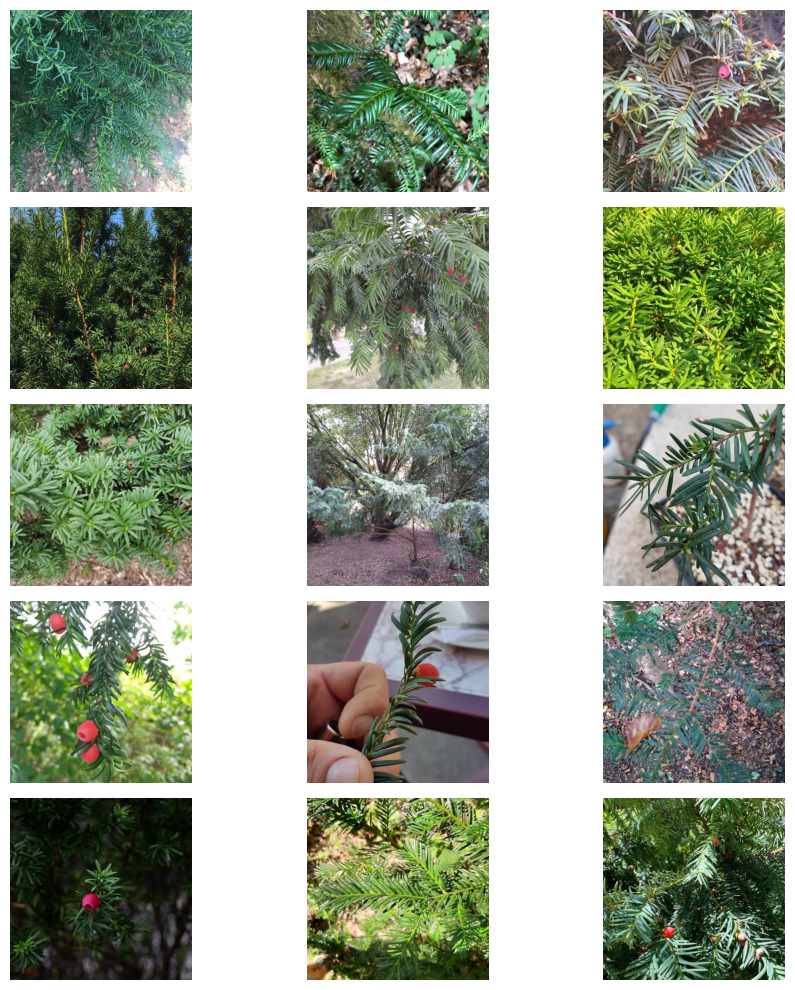

In [37]:
from plantclef.plotting import crop_image_square  # plot_image_grid

# plot_image_grid(image_paths, grid_size=(3, 3), figsize=(10, 10)
import matplotlib.pyplot as plt
from PIL import Image

grid_size = (5, 3)
figsize = (10, 10)
crop_square = True


# img_data = resized_images
img_data = []  # df.image_path

rows, cols = grid_size
fig, axes = plt.subplots(rows, cols, figsize=figsize)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(img_data):
        img = img_data[i]
        if type(img) is str:
            img = Image.open(img)

        # crop image to square if required
        if crop_square:
            img = crop_image_square(img)

        ax.imshow(img)
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()

In [2]:
# from PIL import Image
# import matplotlib.pyplot as plt


# def plot_image_grid(image_paths, grid_size=(3, 3), figsize=(10, 10)):
#     """
#     Plots a grid of images from a list of file paths.

#     Args:
#         image_paths (list): List of image file paths.
#         grid_size (tuple): Tuple specifying the grid size (rows, cols).
#         figsize (tuple): Tuple specifying the figure size.
#     """
#     rows, cols = grid_size
#     fig, axes = plt.subplots(rows, cols, figsize=figsize)
#     axes = axes.flatten()

#     for i, ax in enumerate(axes):
#         if i < len(image_paths):
#             img = Image.open(image_paths[i])
#             ax.imshow(img)
#             ax.axis("off")
#         else:
#             ax.axis("off")

#     plt.tight_layout()
#     plt.show()

In [5]:
# print(f"{len([i for i in image_paths if i.endswith('.jpg')])}")
# print(f"{len(image_paths)}")


# plot_image_grid(image_paths[:10], grid_size=(3, 3), figsize=(10, 10))


# def get_class_from_filepath(filepath: str, classes) -> int:
#     class_name = filepath.split("/")[-2]
#     return classes[class_name]


# def get_inputs(input_dir: str) -> Any:
#     classes = load_imagenet_class_index()
#     filepaths = np.random.permutation(
#         [
#             os.path.join(root, filename)
#             for root, _, filenames in tqdm(walk(input_dir), smoothing=0)
#             for filename in filenames
#         ]
#     )
#     if "train" in input_dir:
#         return [
#             (filepath, get_class_from_filepath(filepath, classes))
#             for filepath in filepaths
#         ]

#     class_names = load_imagenet_val_class_names()
#     return [
#         (filepath, class_names_to_index_map[class_name])
#         for filepath, class_name in zip(filepaths, class_names)
#     ]

1408033
1408033


In [ ]:
# %%time

# from ydata_profiling import ProfileReport

# df = train_metadata.sample(frac=0.1)
# df = df[short_cols]
# profile = ProfileReport(df, title="PlantCLEF2024 Metadata Report", minimal=True)
# # profile.to_file(f"{analysis_dir}/plantclef2024_metadata_report.html")


# # profile = ProfileReport(train_metadata, title="PlantCLEF2024 Metadata Report", explorative=True)
# profile.to_file(f"{analysis_dir}/plantclef2024_metadata_report.html")
